In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d,ConvexHull,Delaunay
import cv2
import matplotlib.pyplot as plt
from collections import Counter,OrderedDict
#from rdfpy import rdf
from scipy.spatial import Voronoi, voronoi_plot_2d,ConvexHull,Delaunay
import skimage
from skimage.util import img_as_float
%matplotlib notebook
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', family='serif', weight='bold')

C:\Users\Anpuj\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [6]:
data=np.loadtxt(r"C:\Users\Anpuj\Downloads\time_series\cooling\filtered_time_series_130K_cooling.txt",skiprows=1,usecols=(1,3,4))

In [42]:
data=np.loadtxt(r"C:\Users\Anpuj\Downloads\time_series\cooling\filtered_time_series_153K_cooling.txt",skiprows=1,usecols=(1,3,4))

In [43]:
t,v1,v2=data[:,0],data[:,1],data[:,2]

<IPython.core.display.Javascript object>


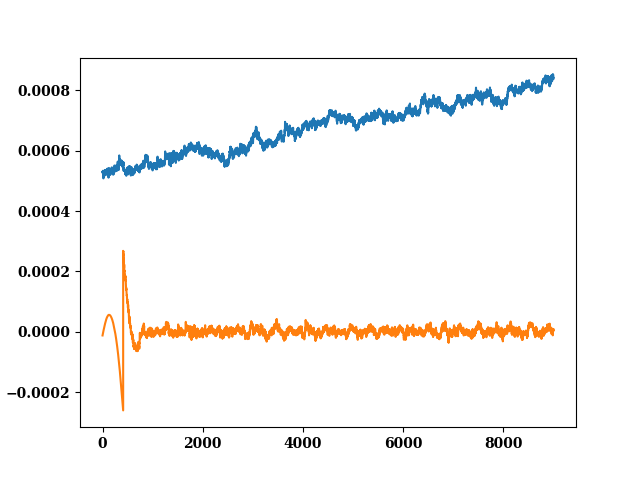

In [44]:
plt.figure()
plt.plot(t,v1,t,v2)

In [45]:
v1.shape[0]//140,v1.shape[0]//10,10

(642, 9000, 10)

In [53]:
from scipy.optimize import curve_fit
def linear(x, a, b):
    return a * x + b
hss=v1
h=[]
for i in range(0,len(hss)):
    h.append(np.sum(hss[:i]))
hss=h

hss=np.array(hss)
ss=range(hss.shape[0]//280,hss.shape[0]//20,100)
#q=2
#plt.figure()
fss=[]
qs=range(-5,5)
for q in qs:
    fs=[]
    if q==0:
        for s in ss:
            f=0
            hcorr=[]
            for i in range(0,hss.shape[0],s):
                if i+s<hss.shape[0]:
                    h=hss[i:i+s]
                else:
                    continue
                popt, pcov = curve_fit(linear, range(len(h)),h)
                h=h-linear(range(len(h)),popt[0],popt[1])
                hcorr=hcorr+list(h)
                f+=np.log(np.sum(h**2)/s)
            for i in range(hss.shape[0],0,-s):
                if i-s>=0:
                    h=hss[i-s:i]
                else:
                    continue
                popt, pcov = curve_fit(linear, range(len(h)),h)
                h=h-linear(range(len(h)),popt[0],popt[1])
                hcorr=hcorr+list(h)
                f+=np.log(np.sum(h**2)/s)
            #plt.plot(range(len(hcorr)),hcorr,label='s={}'.format(s))
            f=f/(4*(hss.shape[0]//s))
            fs.append(np.exp(f))
    else:
        for s in ss:
            f=0
            hcorr=[]
            for i in range(0,hss.shape[0],s):
                if i+s<hss.shape[0]:
                    h=hss[i:i+s]
                else:
                    continue
                popt, pcov = curve_fit(linear, range(len(h)),h)
                h=h-linear(range(len(h)),popt[0],popt[1])
                hcorr=hcorr+list(h)
                f+=(np.sum(h**2)/s)**(q/2)
            for i in range(hss.shape[0],0,-s):
                if i-s>=0:
                    h=hss[i-s:i]
                else:
                    continue
                popt, pcov = curve_fit(linear, range(len(h)),h)
                h=h-linear(range(len(h)),popt[0],popt[1])
                hcorr=hcorr+list(h)
                f+=(np.sum(h**2)/s)**(q/2)
            #plt.plot(range(len(hcorr)),hcorr,label='s={}'.format(s))
            f=f/(2*(hss.shape[0]//s))
            fs.append(f**(1/q))
    #plt.plot(np.log10(ss),np.log10(fs),'.',label=f'{q}')
    fss.append(fs)
    print(q)
#plt.legend()

-5
-4
-3
-2
-1
0
1
2
3
4


In [50]:
from scipy.optimize import curve_fit
def quadratic(x, a, b,c):
    return a * x**2 + b*x +c
hss=v1
h=[]
for i in range(0,len(hss)):
    h.append(np.sum(hss[:i]))
hss=h

hss=np.array(hss)
ss=range(hss.shape[0]//280,hss.shape[0]//20,100)
#q=2
#plt.figure()
fss=[]
qs=range(-10,10)
for q in qs:
    fs=[]
    if q==0:
        for s in ss:
            f=0
            hcorr=[]
            for i in range(0,hss.shape[0],s):
                if i+s<hss.shape[0]:
                    h=hss[i:i+s]
                else:
                    continue
                popt, pcov = curve_fit(quadratic, np.array(range(len(h))),h)
                h=h-quadratic(np.array(range(len(h))),popt[0],popt[1],popt[2])
                hcorr=hcorr+list(h)
                f+=np.log(np.sum(h**2)/s)
            for i in range(hss.shape[0],0,-s):
                if i-s>=0:
                    h=hss[i-s:i]
                else:
                    continue
                popt, pcov = curve_fit(quadratic, np.array(range(len(h))),h)
                h=h-quadratic(np.array(range(len(h))),popt[0],popt[1],popt[2])
                hcorr=hcorr+list(h)
                f+=np.log(np.sum(h**2)/s)
            #plt.plot(range(len(hcorr)),hcorr,label='s={}'.format(s))
            f=f/(4*(hss.shape[0]//s))
            fs.append(np.exp(f))
    else:
        for s in ss:
            f=0
            hcorr=[]
            for i in range(0,hss.shape[0],s):
                if i+s<hss.shape[0]:
                    h=hss[i:i+s]
                else:
                    continue
                popt, pcov = curve_fit(quadratic, np.array(range(len(h))),h)
                h=h-quadratic(np.array(range(len(h))),popt[0],popt[1],popt[2])
                hcorr=hcorr+list(h)
                f+=(np.sum(h**2)/s)**(q/2)
            for i in range(hss.shape[0],0,-s):
                if i-s>=0:
                    h=hss[i-s:i]
                else:
                    continue
                popt, pcov = curve_fit(quadratic, np.array(range(len(h))),h)
                h=h-quadratic(np.array(range(len(h))),popt[0],popt[1],popt[2])
                hcorr=hcorr+list(h)
                f+=(np.sum(h**2)/s)**(q/2)
            #plt.plot(range(len(hcorr)),hcorr,label='s={}'.format(s))
            f=f/(2*(hss.shape[0]//s))
            fs.append(f**(1/q))
    #plt.plot(np.log10(ss),np.log10(fs),'.',label=f'{q}')
    fss.append(fs)
    print(q)
#plt.legend()

-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9


<IPython.core.display.Javascript object>


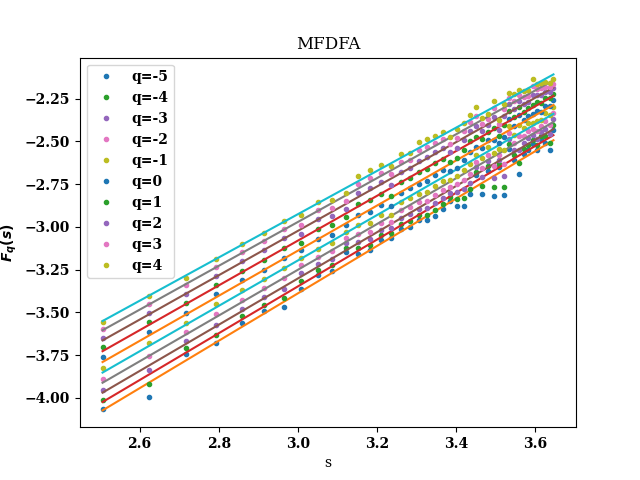

In [54]:
from scipy.optimize import curve_fit
def linear(x, a, b):
    return a * x + b
ms=[]
plt.figure()
for i in range(0,len(qs)):
    plt.plot(np.log10(ss),np.log10(fss[i]),'.',label=f'q={qs[i]}')
    popt, pcov = curve_fit(linear, np.log10(ss),np.log10(fss[i]))
    plt.plot(np.log10(ss),linear(np.log10(ss),popt[0],popt[1]))
    ms.append(popt[0])
plt.title('MFDFA')
plt.xlabel('s')
plt.ylabel('$F_q(s)$')
plt.legend()

<IPython.core.display.Javascript object>


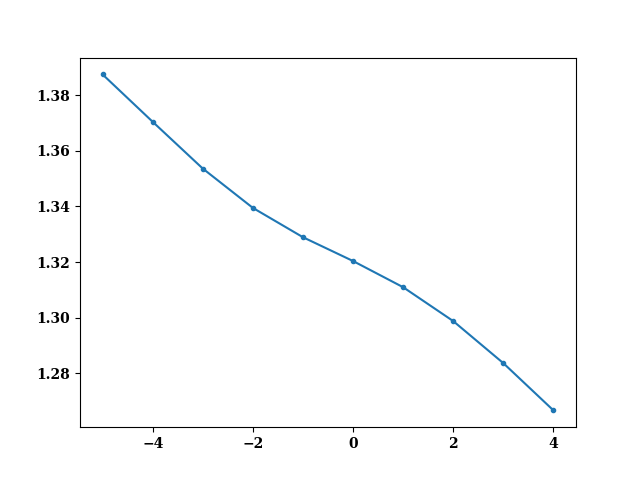

NameError: name 'm2s' is not defined

In [55]:
plt.figure()
plt.plot(qs,ms,'.-')
plt.plot(qs,m2s,'.-',label='shuffled')
plt.xlabel('q')
plt.ylabel('h(q)')
plt.legend()

<IPython.core.display.Javascript object>


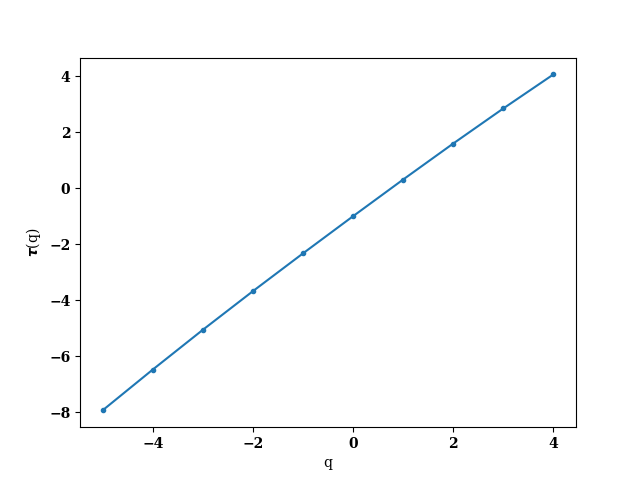

Text(0.5, 0, 'q')

In [56]:
t=[]
for i in range(len(qs)):
    t.append(qs[i]*ms[i]-1)
plt.figure()
plt.plot(qs,t,'.-')
plt.ylabel(r'$\tau$(q)')
plt.xlabel('q')

<IPython.core.display.Javascript object>


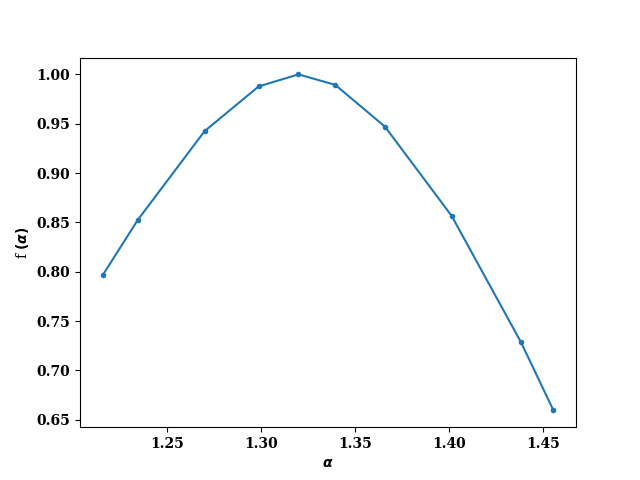

Text(0, 0.5, 'f $(\\alpha)$')

In [57]:
alpha=np.gradient(t)
legendre=[]
for i in range(0,len(qs)):
    legendre.append(qs[i]*alpha[i]-t[i])
plt.figure()
plt.plot(alpha,legendre,'.-')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'f $(\alpha)$')